# Prosjektoppgave i Py1010

<u>Laga av</u>: Kay Roger Haugen - kay.roger.haugen@gmail.com

<u>Sist oppdatert</u>: 2025-03-26

Eg har valt å løyse den ferdigdefinerte oppgåva "Support dashboard". Den går ut på å utføre diverse analyser av data som er loggført for supportavdelinga ved telefonselskapet MORSE. Alle kundehenvendingar til MORSE  blir loggført i fila "support_uke_24.xlsx". Den består av 4 kolonner:
1. Vekedag hendinga fann stad
2. Klokkeslett kunden tok kontakt med supportavdelinga
3. Varigheit på samtala
4. Kunden sin tilfredsheit (1-10 der 1 er svært misfornøgd og 10 er svært fornøgd)

NB! Alle kodefelta må køyrast frå toppen og ned for at alt skal virke.

***

<div style="background-color: #a0d2d9">

## Del A

Programmet les inn excelfila og lagrar data frå dei 4 kolonnene i kvar sine arrays.

</div>

In [2]:
import pandas as pd  # Importerer pandas-pakken for å kunne jobbe med excel-filer
import numpy as np  # Importerer numpy-pakken for å kunne jobbe med arrays

fil = 'support_uke_24.xlsx'  # Namnet på excel-fila som ligg i same mappe som programmet
data = pd.read_excel(fil)  # Les inn excel-fila

u_dag = np.array(data['Ukedag'].values)  # Lagrar data frå kolonne 1 ('Ukedag') i ein array
kl_slett = np.array(data['Klokkeslett'].values)  # Lagrar data frå kolonne 2 ('Klokkeslett') i ein array
varighet = np.array(data['Varighet'].values)  # Lagrar data frå kolonne 3 ('Varighet') i ein array
score = np.array(data['Tilfredshet'].values)  # Lagrar data frå kolonne 4 ('Tilfredshet') i ein array

<div style="background-color: #a0d2d9">

## Del B

Programmet finn tal henvendingar for kvar av dei 5 vekedagane og visualiserer dette i eit søylediagram.

</div>

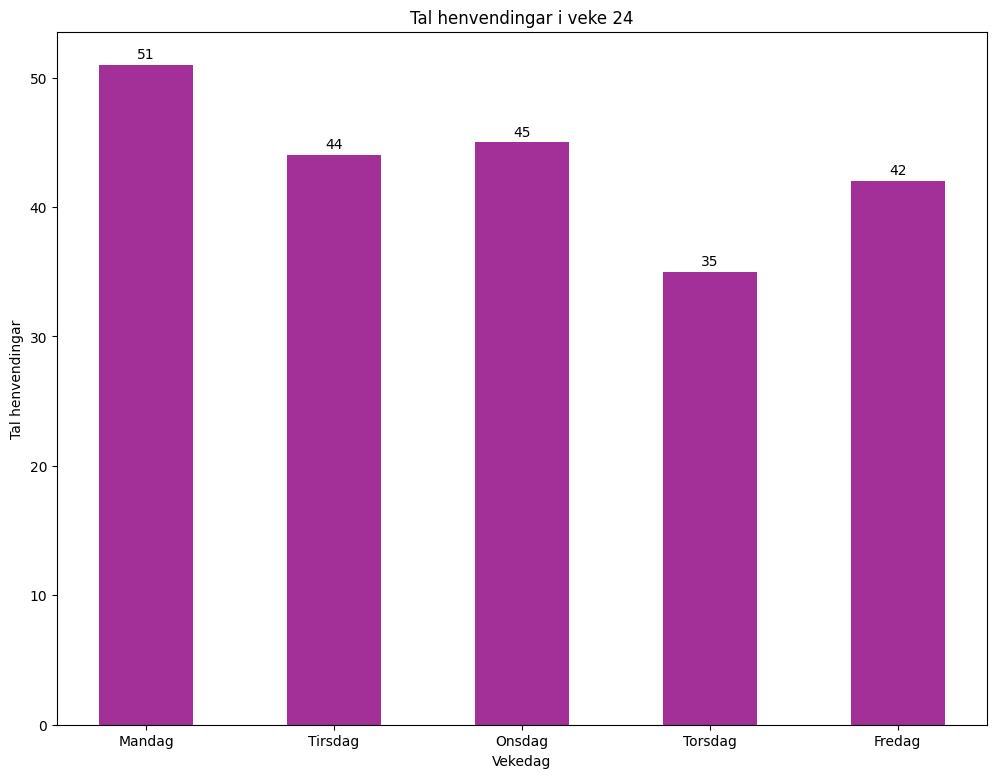

In [3]:
import matplotlib.pyplot as plt  # Importerer pyplot-pakken for å kunne jobbe med plotting

ukedager = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']  # Definerer ei liste med vekedagane
ant_henv = np.zeros(len(ukedager), dtype=int)  # Definerer ein array med 0-verdi av typen int for kvar vekedag

for dag in u_dag:  # Går gjennom tabellen med vekedagane og hentar ut navnet på dagen for kvar rad
    index = ukedager.index(dag)  # Finn ut kva indeks den aktuelle vekedagen har i lista 'ukedager', og dermed også i lista 'ant_henv'
    ant_henv[index] += 1  # Oppdaterer talet på henvendingar for den aktuelle vekedagen med 1 ekstra henvending

plt.close('all')  # Lukkar eventuelle eksisterande figurar
plt.figure(num=1, figsize=(12,9))  # Opprettar ein ny figur med nummer '1' med breidde 12 og høgde 9
plt.bar(ukedager, ant_henv, width=0.5, color='#a32f98')  # Lagar søyler som viser tal henvendingar for kvar vekedag, med oppgitt breidde og farge

offset_y= 0.5  # Verdi som forskyver søyleteksten i y-retning slik at den havnar med luft over søylene

# Plottar tekst over kvar søyle og sentrerer teksten
for i in range(0, len(ukedager)):
    plt.text(ukedager[i], ant_henv[i]+offset_y, str(ant_henv[i]), ha='center')

plt.title('Tal henvendingar i veke 24')  # Legg på tittel over søylediagrammet
plt.xlabel('Vekedag')  # Legg på label til x-aksen
plt.ylabel('Tal henvendingar')  # Legg på label til y-aksen

plt.show()  # Sikrar at plottet blir synleg

<div style="background-color: #a0d2d9">

## Del C

Programmet finn minste og lengste samtaletid som er loggført for veke 24 og skriv svaret til skjerm.<br>
NB! Programmet sjekkar ikkje om det er fleire samtalar som har minste og kortaste samtaletid.

</div>

In [4]:
veke = '24'  # vekenummer
min_tid_index = 0  # indeksen i arrayane frå oppgåve A der minste samtaletid ligg. Brukast for å skrive ut data frå alle arrayane til slutt.
max_tid_index = 0  # indeksen i arrayane frå oppgåve A der lengste samtaletid ligg. Brukast for å skrive ut data frå alle arrayane til slutt.

# Set minste og lengste tid til samtaletida som ligg på første rad i arrayen.
# Fjernar teiknet ':' i teksten og gjer talet om til typen 'int' for å kunne samanlikne talverdiane.
min_tid = max_tid = int(varighet[0].replace(':', ''))

# Går gjennom alle samtalane for å finne minste og lengste verdi.
for i in range(1, len(varighet)):
    tid = int(varighet[i].replace(':', ''))  # Hentar ut neste samtaletid og konverterer teksten til 'int' utan skilleteikn
    # Sjekkar om vi har ny minstetid og set isåfall ny verdi på både tid og indeks
    if tid < min_tid:
        min_tid = tid
        min_tid_index = i
    # Sjekkar om vi har ny makstid og set isåfall ny verdi på både tid og indeks
    elif tid > max_tid:
        max_tid = tid
        max_tid_index = i

# Splittar opp minste og lengste tid i ei liste med verdiar for timar, minutt og sekund
min_tid_tms = varighet[min_tid_index].split(':')
max_tid_tms = varighet[max_tid_index].split(':')

# Utskrift der data frå fleire av arrayane blir brukt med hjelp av variablane som lagra indeksane for minste og lengste samtaletid
print('Minste samtaletid som er loggført i veke', veke, 'var på', min_tid_tms[0], 'timar', min_tid_tms[1], 'minutt', min_tid_tms[2], 'sekund,', u_dag[min_tid_index].lower(), 'klokka', kl_slett[min_tid_index])
print('Lengste samtaletid som er loggført i veke', veke, 'var på', max_tid_tms[0], 'timar', max_tid_tms[1], 'minutt', max_tid_tms[2], 'sekund,', u_dag[max_tid_index].lower(), 'klokka', kl_slett[max_tid_index])

Minste samtaletid som er loggført i veke 24 var på 00 timar 00 minutt 59 sekund, tirsdag klokka 08:39:50
Lengste samtaletid som er loggført i veke 24 var på 00 timar 11 minutt 28 sekund, fredag klokka 10:16:01


<div style="background-color: #a0d2d9">

## Del D

Programmet reknar ut gjennomsnittleg samtaletid basert på alle henvendingar i veke 24 og skriv svaret til skjerm.

</div>

In [5]:
sum_samt_tim = 0  # Summen av tal timar før første teiknet ":" i kvar samtale
sum_samt_min = 0  # Summen av tal minutt mellom dei to teikna ":" i kvar samtale
sum_samt_sek = 0  # Summen av tal sekund etter siste teiknet ":" i kvar samtale
gjs_tim = 0  # Tal timar i den gjennomsnittlege samtalatida
gjs_min = 0  # Tal minutt i den gjennomsnittlege samtalatida
gjs_sek = 0  # Tal sekund i den gjennomsnittlege samtalatida
ant_samtalar = len(varighet)  # Tal samtalar den aktuelle veka

def sek_til_tim_min(sek_inn):
    '''
    Funksjonen reknar om tal sekund til tal timar, restminutt og restsekund, og returnerer desse tre verdiane.
    '''
    timar = sek_inn // 3600  # Heiltalsdivisjon for å rekne ut kor mange heile timar som inngår i dei totale sekunda
    minutt = (sek_inn % 3600) // 60  # Reknar ut resterande sekund etter førre operasjon, og bruker heiltalsdivisjon for å rekne ut tal minutt i restsekunda 
    sekund = sek_inn % 60  # Brukar modulus til å rekne ut resterande sekund
    return timar, minutt, sekund  # Returnerer dei tre utrekna verdiane

def min_til_tim(min_inn):
    '''
    Funksjonen reknar om tal minutt til timar og restminutt, og returnerer desse to verdiane.
    '''
    timar = min_inn // 60  # Heiltalsdivisjon for å rekne ut kor mange heile timar som inngår i dei totale minutta
    minutt = min_inn % 60  # Brukar modulus til å rekne ut resterande minutt
    return timar, minutt  # Returnerer dei to utrekna verdiane

# Går gjennom alle samtalane og summerer tal timar, minutt og sekund kvar for seg
for i in range(0, ant_samtalar):
    sam_tim, sam_min, sam_sek = varighet[i].split(':')  # Kvar samtale blir splitta på teiknet ":" og tal timar, minutt og sekund blir lagt i ein tuppel
    sum_samt_tim += int(sam_tim)  # Summerer tal timar
    sum_samt_min += int(sam_min)  # Summerer tal minutt
    sum_samt_sek += int(sam_sek)  # Summerer tal sekund

tot_sek = (sum_samt_tim*3600) + (sum_samt_min*60) + sum_samt_sek  # Reknar om summen av alle samtalane sine timar, minutt og sekund til totale sekund
gjs_tot_sek = int(tot_sek/ant_samtalar)  # Reknar ut gjennomsnittleg samtaletid i sekund for alle henvendingar den aktuelle veka

konv_tim, konv_min, konv_sek = sek_til_tim_min(gjs_tot_sek)  # Brukar funksjonen for å konvertere sekunda til timar, minutt og sekund, og lagrar i tuppel
gjs_tim += konv_tim  # Summerer timetala til den gjennomsnittlege samtaletida
gjs_min += konv_min  # Summerer minuttala til den gjennomsnittlege samtaletida
gjs_sek = konv_sek  # Sekundtalet til den gjennomsnittlege samtaletida

konv_tim, konv_min = min_til_tim(gjs_min)  # Brukar funksjonen for å konvertere minutta til timar og minutt, og lagrar i tuppel
gjs_tim += konv_tim  # Summerer timetala til den gjennomsnittlege samtaletida
gjs_min = konv_min  # Summerer minuttala til den gjennomsnittlege samtaletida

# Skriv ut svaret på gjennomsnittleg samtaletid den aktuelle veka
print('Gjennomsnittleg samtaletid på alle henvendingar i veke', veke, 'var på', gjs_tim, 'timar', gjs_min, 'minutt', gjs_sek, 'sekund')

Gjennomsnittleg samtaletid på alle henvendingar i veke 24 var på 0 timar 6 minutt 40 sekund
